<a href="https://colab.research.google.com/github/abrahammathews2000/Catalog_Cross_matching/blob/main/LAT_BAT_Catalog_Cross_matching_GIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BAT: 
blank2      BAT_NAME         RA     DEC   ... LUM  ASSOC_STREN CL2     TYPE   
------ ------------------ ------- ------- ... ---- ----------- --- -----------
     1 SWIFT J0001.0-0708   0.228  -7.164 ... 43.6          --  50       Sy1.9
     2 SWIFT J0001.6-7701   0.445   -77.0 ... 44.0          --  50       Sy1.9
     3 SWIFT J0002.5+0323   0.613   3.365 ... 43.2          --  40       Sy1.5
     4 SWIFT J0003.3+2737   0.856  27.643 ... 43.5          --  50         Sy2
     5 SWIFT J0005.0+7021   0.934  70.358 ... 44.4          --  50       Sy1.9
     6 SWIFT J0006.2+2012   1.596  20.242 ... 43.3          --  40       Sy1.2
     7 SWIFT J0009.4-0037   2.305  -0.639 ... 44.1          --  50         Sy2
     8 SWIFT J0010.5+1057   2.616  10.969 ... 44.7          --  80  Beamed AGN
     9 SWIFT J0017.1+8134   4.483  81.569 ... 48.0          --  80  Beamed AGN
    10 SWIFT J0021.2-1909   5.289 -19.162 ... 44.6          --  50         Sy2
   ...                ...     ...     ... ... 

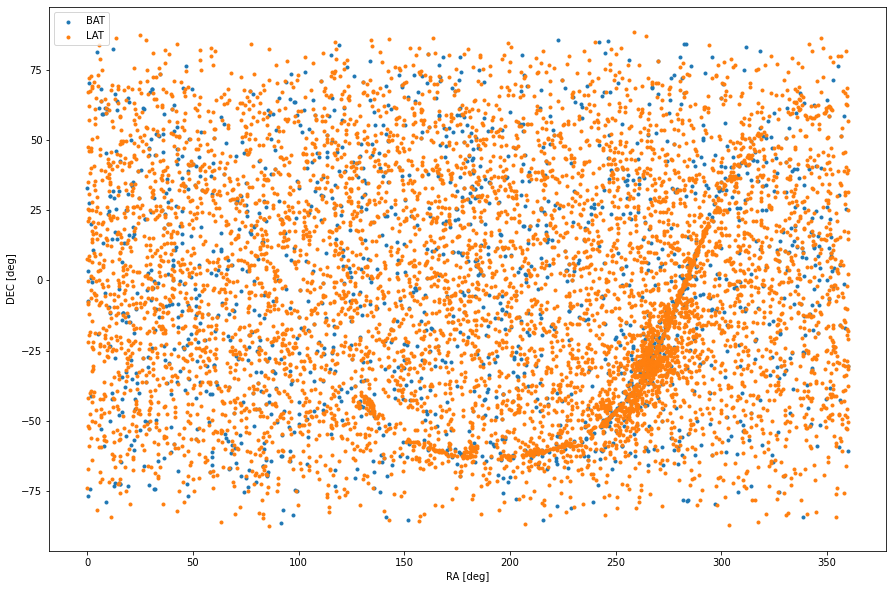

In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import match_coordinates_sky

bat_file = "https://raw.githubusercontent.com/abrahammathews2000/Dataset_for_Gcolab/main/Tut3/SwiftBATcatalog.txt"
lat_file = "https://raw.githubusercontent.com/abrahammathews2000/Dataset_for_Gcolab/main/Tut3/Full_LAT_catalog.txt"

#Reading file
#In BAT: Column names RA, DEC
BAT = ascii.read(bat_file)
#In LAT: Column names ra, dec
LAT = ascii.read(lat_file)
#la_ra_h = LAT['ra']*u.hourangle
#la_ra_deg = la_ra_h.to(u.deg)
print("BAT: ")
print(BAT)

print("LAT: ")
print(LAT)

LAT.rename_column('col3', 'RA')
LAT.rename_column('col4', 'DEC')

print("LAT: ")
print(LAT['RA'])
print(LAT['DEC'])

coord_BAT = SkyCoord(ra=BAT['RA'],dec=BAT['DEC'],unit=(u.deg, u.deg))
print("Coord_BAT: ", coord_BAT)

coord_LAT = SkyCoord(ra=LAT['RA'],dec=LAT['DEC'],unit=(u.hourangle, u.deg))
print("Coord_LAT: ", coord_LAT)

plt.figure(figsize=(15,10))
plt.scatter(coord_BAT.ra.degree, coord_BAT.dec.degree,marker='.',label = 'BAT')
plt.scatter(coord_LAT.ra.degree, coord_LAT.dec.degree,marker='.',label = 'LAT')
plt.xlabel("RA [deg]")
plt.ylabel("DEC [deg]")
plt.legend(loc='upper left')
plt.show()

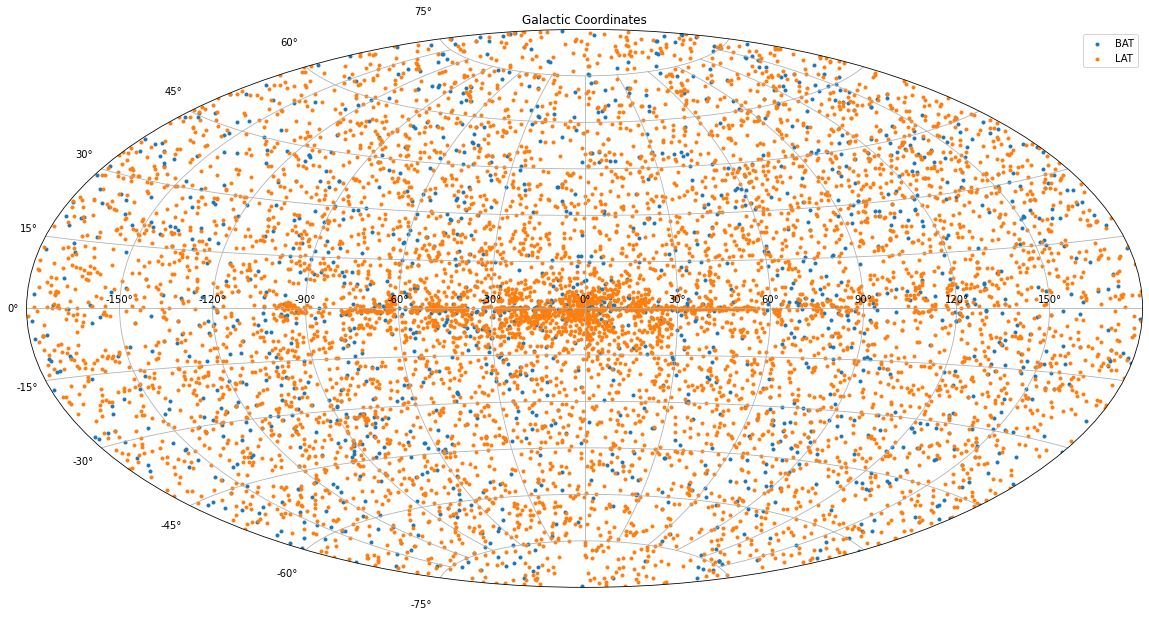

In [2]:
fig = plt.figure(figsize=(20,10))

gal_BAT = coord_BAT.transform_to('galactic')
gal_LAT = coord_LAT.transform_to('galactic')

ax = fig.add_subplot(111,projection='aitoff')
ax.scatter(gal_BAT.l.wrap_at('180d').radian, gal_BAT.b.radian, marker='.',label = 'BAT') #angles should be in radians
ax.scatter(gal_LAT.l.wrap_at('180d').radian, gal_LAT.b.radian,  marker='.',label = 'LAT') #l should have wrap_at(180d)

plt.title("Galactic Coordinates")
plt.grid(True)
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.legend()
plt.show()

<SkyCoord (ICRS): (ra, dec) in deg
    [(3.15000000e-01,  -7.79722222), (3.57832500e+02, -75.98638889),
     (3.59832917e+02,   2.26027778), ..., (3.54248333e+02, -58.98805556),
     (3.56302917e+02, -15.91833333), (3.59834167e+02,  25.04166667)]>
<SkyCoord (ICRS): (ra, dec) in deg
    [(2.28000e-01,  -7.164), (4.45000e-01, -77.   ),
     (6.13000e-01,   3.365), ..., (3.55738e+02, -59.325),
     (3.56167e+02, -15.731), (3.58983e+02,  25.552)]>
No. of cross matched objects =  138


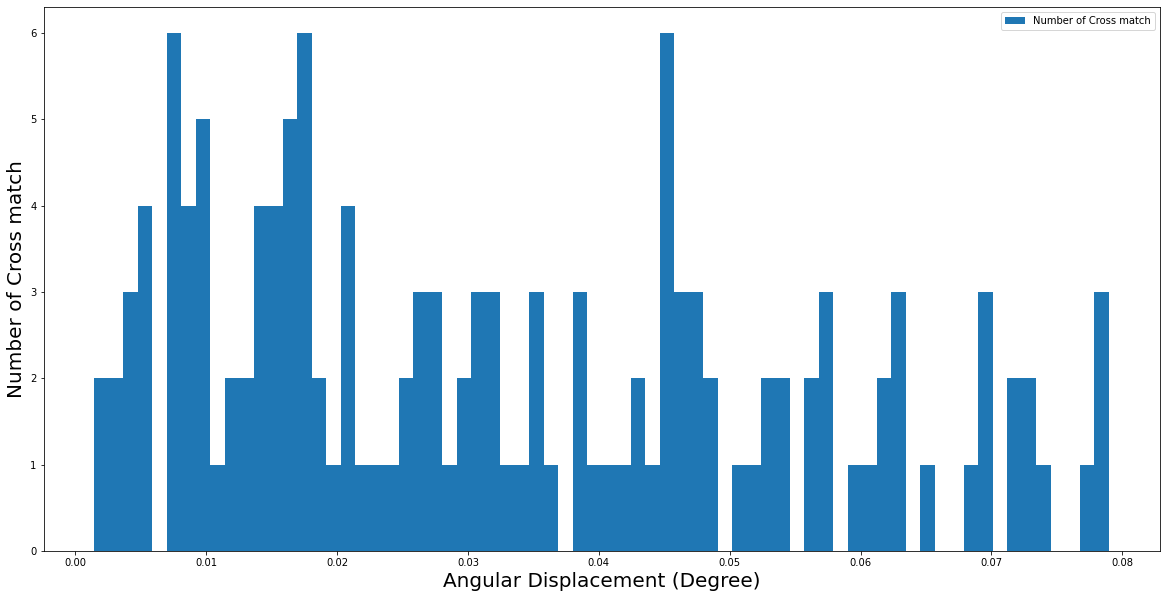

In [3]:
matchIndexLAT, d2d,_= match_coordinates_sky(coord_BAT,coord_LAT,1)  #(MATCH COORD(SMALL),CATALOG COORD(LARGE))
print(coord_LAT[matchIndexLAT])
print(coord_BAT)


d2dmin = d2d[d2d.degree<=0.08]
print("No. of cross matched objects = ",len(d2dmin))


#Histogram
fig, ax = plt.subplots(figsize=(20,10))
ax.hist(d2dmin.degree,70)

#Labelling
plt.xlabel("Angular Displacement (Degree)",fontsize=20)
plt.ylabel("Number of Cross match",fontsize=20)
plt.legend(['Number of Cross match'],loc="upper right")
plt.title('')
# Show plot
plt.show()